<a href="https://colab.research.google.com/github/MiguelStrelow/CNC/blob/main/Relat%C3%B3rio3_MigueldeTunesStrelow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

##Algumas utilidades


In [ ]:
x = sp.Symbol('x')

In [ ]:
def constroi_PolN_(i, Dif, abscissas):
        pol = f"{Dif[i]:.6f}"

        for k in range(i):

            pol += f" * (x - {abscissas[k]:.6f})"

        return pol

In [ ]:
def constroi_PolN(abscissas, Dif, pontos):

  pol = constroi_PolN_(0, Dif, abscissas)

  for i in range(1, pontos):

      pol += f" + {constroi_PolN_(i, Dif, abscissas)}"

  print(f"O polinômio calculado é:\n{pol}")

In [ ]:
def constroi_mmq(coeficientes):
  i = len(coeficientes)

  pol = f"{coeficientes[i-1]:.6f}"

  for k in range(0, i-1):

    pol += f"+ {coeficientes[k]:.6f} * x ** {i-k-1}"



  pol1 = sp.parsing.sympy_parser.parse_expr(pol)

  print(f"O polinômio calculado é:\n", pol1)

  return pol1

In [ ]:
def gauss(A, b, n):
  for j in range(0, n):
    if abs(A[j][j] != 0):
      r = 1/A[j][j]

      for i in range(j+1, n):
        mult = A[i][j]*r
        A[i][j] = 0
        for k in range(j+1, n):
          A[i][k] = A[i][k] - mult*A[j][k]

        b[i] = b[i] - mult*b[j]

  res = np.linalg.solve(A, b)
  return np.ndarray.tolist(res)

In [ ]:
def plotar(f1, f2, f3, abscissas, ordenadas, titulo, limite1, limite2):
  aux = []
  inicio = limite1
  fim = limite2
  nro_de_pontos = 10000
  plt.axhline(y=0, color = "black", linestyle = '--')
  curva = np.linspace(inicio, fim, nro_de_pontos)

  f1 = sp.lambdify(x, f1, "numpy")
  f2 = sp.lambdify(x, f2, "numpy")
  f3 = sp.lambdify(x, f3, "numpy")

  valores = [f1(valor) for valor in curva]
  plt.plot(curva, valores, color = "black", linestyle='-')

  valores2 = [f2(valor2) for valor2 in curva]
  plt.plot(curva, valores2, color = "red",  linestyle='-')

  valores3 = [f3(valor3) for valor3 in curva]
  plt.plot(curva, valores3, color = "green",  linestyle='-')

  plt.scatter(abscissas, ordenadas)
  plt.title(titulo)
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.grid()
  plt.show()


#Definição dos algoritmos


##Polinômio de Lagrange

In [ ]:
def polLagrange(pontos, abscissas, ordenadas, interpola):
  interpolado = 0
  for i in range(0, pontos):
    c = 1
    d = 1
    for j in range(0, pontos):
      if i != j:
        c = c * (interpola - abscissas[j])
        d = d * (abscissas[i] - abscissas[j])

    interpolado += ordenadas[i] * c/d

  return interpolado

In [ ]:
polLagrange(3, [1, 2, 5], [12, 4, 9], 2)

4.0

##Polinômio de Newton

In [ ]:
def polNewton(pontos, abscissas, ordenadas, interpola, print_flag):
  Dif = [0 for _ in range(pontos)]
  for i in range(pontos):

    Dif[i] = ordenadas[i]

  for i in range(1, pontos):
    for k in range(pontos - 1, i - 1, -1):

      Dif[k] = (Dif[k] - Dif[k-1])/(abscissas[k] - abscissas[k-i])


  interpolado = Dif[-1]
  for i in range(pontos - 2, -1, -1):
    interpolado = interpolado * (interpola - abscissas[i]) + Dif[i]

  if print_flag:
    constroi_PolN(abscissas, Dif, pontos)

  return interpolado


In [ ]:
polNewton(3, [1, 2, 5], [12, 4, 9], 2, 0)

4.0

##Spline Cúbica Natural

In [ ]:
def cubic_Spline(pontos, abscissas, ordenadas, interpola):

  h = [0 for _ in range(0, pontos)]
  l = [0 for _ in range(0, pontos)]
  mu = [0 for _ in range(0, pontos)]
  z = [0 for _ in range(0, pontos)]
  alfa = [0 for _ in range(0, pontos)]
  b = [0 for _ in range(0, pontos)]
  c = [0 for _ in range(0, pontos)]
  d = [0 for _ in range(0, pontos)]
  A = [0 for _ in range(0, pontos)]


  for i in range(0, pontos - 1):
    h[i] = abscissas[i+1] - abscissas[i]

  for i in range(1, pontos - 1):
    alfa[i] = ((3 / h[i]) * (ordenadas[i+1] - ordenadas[i])) - ((3/h[i-1]) * (ordenadas[i] - ordenadas[i-1]))

  l[0] = 1
  mu[0] = 0
  z[0] = 0

  for i in range(1, pontos-1):
    l[i] = 2 * (abscissas[i+1] - abscissas[i-1]) - (h[i-1] * mu[i-1])
    mu[i] = h[i] / l[i]
    z[i] = (alfa[i] - (h[i-1] * z[i-1]))/l[i]

  l[pontos - 1] = 1
  z[pontos - 1] = 0
  c[pontos - 1] = 0

  for j in range(pontos - 2, -1, -1):
    c[j] = z[j] - (mu[j] * c[j+1])
    b[j] = ((ordenadas[j+1] - ordenadas[j])/h[j]) - ((h[j]*(c[j+1] + 2 * c[j]))/3)
    d[j] = (c[j+1] - c[j])/(3*h[j])


  for j in range(0, pontos):
    A[j] = [ordenadas[j], b[j], c[j], d[j]]

  for i in range(0, pontos-1):
    if abscissas[i] <= interpola <= abscissas[i+1]:
      resultado = ordenadas[i] + b[i] * (interpola - abscissas[i]) + c[i] * (interpola - abscissas[i]) ** 2 + d[i] * (interpola - abscissas[i]) ** 3

  return resultado

In [ ]:
cubic_Spline(8, [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7], [1, 1.04881, 1.09545, 1.14018, 1.18322, 1.22474, 1.26491, 1.30384], 1.48)

1.2165453799793886

##Mínimos quadrados


In [ ]:
def mmq(pontos, abscissas, ordenadas, grauPol):
  #Falta implementar a métrica
  sumx = 0
  sumxy = 0
  sumxsqry = 0
  sumxcby = 0
  st = 0
  sumy = 0
  sumxsqr = 0
  sumxcb = 0
  sumxfr = 0
  sumxqn = 0
  sumxsx = 0
  sr = 0

  for i in range(0, pontos):

    sumx += abscissas[i]
    sumy += ordenadas[i]
    sumxy += abscissas[i] * ordenadas[i]
    sumxsqr += abscissas[i] * abscissas[i]
    if grauPol >= 2:
      sumxcb += (abscissas[i] ** 3)
      sumxfr += (abscissas[i] ** 4)
      sumxsqry += (abscissas[i] * abscissas[i] * ordenadas[i])
      if grauPol >= 3:
        sumxqn += (abscissas[i] ** 5)
        sumxsx += (abscissas[i] ** 6)
        sumxcby += ((abscissas[i] ** 3) * ordenadas[i])

  mediax = sumx / pontos
  mediay = sumy / pontos

  if grauPol == 1:
    Matriz = [[sumxsqr, sumx], [sumx, pontos]]
    Vresults = [sumxy, sumy]
#|sumxsqr   sumx | * |a| = |sumxy|
#|sum x    pontos|   |b|   |sumy |


  else:
    if grauPol == 2:
      Matriz = [[sumxfr, sumxcb, sumxsqr], [sumxcb, sumxsqr, sumx], [sumxsqr, sumx, pontos]]
      Vresults = [sumxsqry, sumxy, sumy]
#|sumxfr  sumxcb  sumxsqr| * |a| = |sumxsqry|
#|sumxcb  sumxsqr  sumx  |   |b|   | sumxy  |
#|sumxsqr sumx    pontos |   |c|   |  sumy  |
    else:
      if grauPol == 3:
        Matriz = [[sumxsx, sumxqn, sumxfr, sumxcb],[sumxqn, sumxfr, sumxcb, sumxsqr], [sumxfr, sumxcb, sumxsqr, sumx], [sumxcb, sumxsqr, sumx, pontos]]
        Vresults = [sumxcby, sumxsqry, sumxy, sumy]

#|sumxsx  sumxqn  sumxfr  sumxcb |   |a|   |sumxcby |
#|sumxqn  sumxfr  sumxcb  sumxsqr|   |b| = |sumxsqry|
#|sumxfr  sumxcb  sumxsqr sumx   |   |c|   | sumxy  |
#|sumxcb  sumxsqr  sumx   pontos |   |d|   |  sumy  |

  a = gauss(Matriz, Vresults, grauPol+1)

  return a



In [ ]:
teste = mmq(4, [0, 1, 2, 4], [1, 10, 49, 313], 3)

In [ ]:
constroi_mmq(teste)

O polinômio calculado é:
 4.0*x**3 + 3.0*x**2 + 2.0*x + 1.0


4.0*x**3 + 3.0*x**2 + 2.0*x + 1.0

#Relatório

##1) Usando interpolação de Newton, construa o polinômio interpolador de grau 4 para estimar a população no ano 1965.

In [ ]:
r = polNewton(5, [1940, 1950, 1960, 1970, 1980], [132165, 151326, 179323, 203302, 226542], 1965, 1)
print("O valor interpolado é:\n", r)


O polinômio calculado é:
132165.000000 + 1916.100000 * (x - 1940.000000) + 44.180000 * (x - 1940.000000) * (x - 1950.000000) + -2.142333 * (x - 1940.000000) * (x - 1950.000000) * (x - 1960.000000) + 0.067221 * (x - 1940.000000) * (x - 1950.000000) * (x - 1960.000000) * (x - 1970.000000)
O valor interpolado é:
 191987.9296875


##2)Usando interpolação Lagrange, determine a distância percorrida 15,6 minutos depois da partida.

In [ ]:
l = polLagrange(4, [0, 10, 20, 30], [0, 20.56, 30.67, 67.78], 15.6)
print("A distância percorrida neste momento era de:\n", l, "Km")


A distância percorrida neste momento era de:
 25.1098432 Km


##3)
a) Calcular Pn(0,3) utilizando polinômios interpoladores de graus n = 1, 2, 3, 4, 5 e 6


In [ ]:
print("Os valores calculados para Pn(0.3) por polinômio de Lagrange são:\n")

for i in range(2, 8):
  a = polLagrange(i, [0, 0.5, 1.0, 1.5, 2, 2.5, 3], [0.5, 0.69146, 0.84134, 0.93319, 0.97725, 0.99379, 0.99865], 0.3)
  print("Grau", i-1, ":", a, "\n")

Os valores calculados para Pn(0.3) por polinômio de Lagrange são:

Grau 1 : 0.614876 

Grau 2 : 0.6198656 

Grau 3 : 0.6189444000000001 

Grau 4 : 0.618047616 

Grau 5 : 0.6176669683200002 

Grau 6 : 0.6176301068800005 



b) Interpolar z = 0,3, via Splines Cúbicas Naturais.



In [ ]:
b = cubic_Spline(7, [0, 0.5, 1.0, 1.5, 2, 2.5, 3], [0.5, 0.69146, 0.84134, 0.93319, 0.97725, 0.99379, 0.99865], 0.3)
print("O valor calculado por Splines foi:", b)

O valor calculado por Splines foi: 0.6178588873846154


c) Comparar os resultados obtidos nas letras a e b com o valor tabela de z, N(0,3) =
0,61791

  Os polinômios de ordem mais baixa tiveram maior diferença em relação ao resultado tabelado do que os de ordem mais alta, o que mostra que, quanto maior a ordem do polinômio, maior tende a ser a precisão
  
  Todas as diferenças foram na ordem de 10^-3, o que quer dizer que, se trabalhamos com uma precisão até a segunda casa decimal, não faria diferença qual grau escolher. Neste caso, escolher o grau 1 pode poupar recursos, o que pode ser desejável eventualmente.

  A spline cúbica, por sua vez, teve uma precisão maior. Apesar de apresentar diferença na mesma ordem que os polinômios, esta diferença é de apenas 0,00004 unidades, enquanto nos pol's a menor diferença é de 0,00028 unidades

  No geral, podemos ver que as Splines cúbicas apresentam maior precisão em relação a polinômios, para interpolações

##4)Use o método dos mínimos quadrados para calcular:

a)Um polinômio linear que estime k com função de T;

In [ ]:
a = mmq(7, [10, 20, 40, 50, 100, 200, 300], [90, 180, 280, 290, 230, 200, 200], 1)
f1 = constroi_mmq(a)

O polinômio calculado é:
 0.028352*x + 207.08384


b) Um polinômio quadrático que faça prever a relação entre k e T;


In [ ]:
b = mmq(7, [10, 20, 40, 50, 100, 200, 300], [90, 180, 280, 290, 230, 200, 200], 2)
f2 = constroi_mmq(b)

O polinômio calculado é:
 -0.003772*x**2 + 1.168696*x + 167.71564


c) Um polinômio cúbico que faça prever a relação entre k e T.


In [ ]:
c = mmq(7, [10, 20, 40, 50, 100, 200, 300], [90, 180, 280, 290, 230, 200, 200], 3)
f3 = constroi_mmq(c)

O polinômio calculado é:
 7.6e-5*x**3 - 0.038995*x**2 + 5.219232*x + 83.24922


Qual dos polinômios parece mais adequado para você? Justifique.

Analisando o gráfico abaixo, o polinômio de grau 3 parece apresentar os resultados mais próximos, de forma mais consistente. O pol de grau 2 apenas apresenta boa aproximação para 3 dos pontos dados, enquanto o de grau 1 apresenta aproximação dos pontos para valores maiores de temperatura, mas erra fortemente para os valores menores.

Respondendo: O polinômio de grau 3 aparenta ser o mais consistente, cometendo apenas um erro relativamente grande, enquanto os outros apresentam mais. O grau 3 também apresenta as melhores aproximações, no geral.

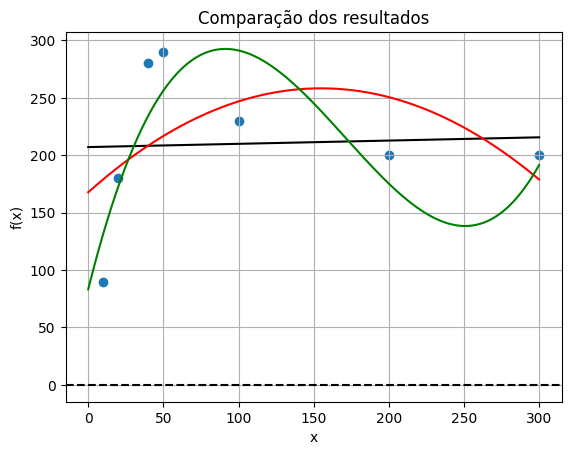

In [ ]:
plotar(f1, f2, f3, [10, 20, 40, 50, 100, 200, 300], [90, 180, 280, 290, 230, 200, 200], "Comparação dos resultados", 0, 300)
